# Polynomial Regression and LassoCV with feature dropping

Thinkig about my first steps into this project, I remeberd how the simple linear regression model use to improve when some highly correlated features were dropped from the data. Following this path, I try now to mix the Polynomial regression I made on my last step with this, in order to see wheter the model improves or remains the same.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from poly_lasso_cv import poly_lasso_cv, poly_lasso_cv_pred

In [5]:
diamonds = pd.read_csv('../data/train_cate.csv')
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.50,5,7,4,62.3,55.0,5.11,5.07,3.17,1845
1,1,1.54,2,2,5,63.6,60.0,7.30,7.33,4.65,10164
2,2,1.32,3,1,2,61.7,60.0,6.95,7.01,4.31,5513
3,3,1.20,5,2,3,62.1,55.0,6.83,6.79,4.23,5174
4,4,1.73,4,2,3,61.2,60.0,7.67,7.65,4.69,10957


### x, y and z features (size) out

First, I try dropping the columns related to the size of the diamond, which are 'x', 'y' and 'z', and perform the pipeline model with that data and a range of degrees for the polinomials between 2 and 10.

In [3]:
X = diamonds.iloc[:,1:-4]
y = diamonds.price

In [4]:
X.head()

,carat,cut,color,clarity,depth,table
0,0.50,5,7,4,62.3,55.0
1,1.54,2,2,5,63.6,60.0
2,1.32,3,1,2,61.7,60.0
3,1.20,5,2,3,62.1,55.0
4,1.73,4,2,3,61.2,60.0


In [21]:
mae_dict, rmse_dict, rsquare_dict = poly_lasso_cv(2,10,X,y,.2)

Degree 2 calculated
Degree 3 calculated
Degree 4 calculated
Degree 5 calculated
Degree 6 calculated
Degree 7 calculated
Degree 8 calculated
Degree 9 calculated
Degree 10 calculated


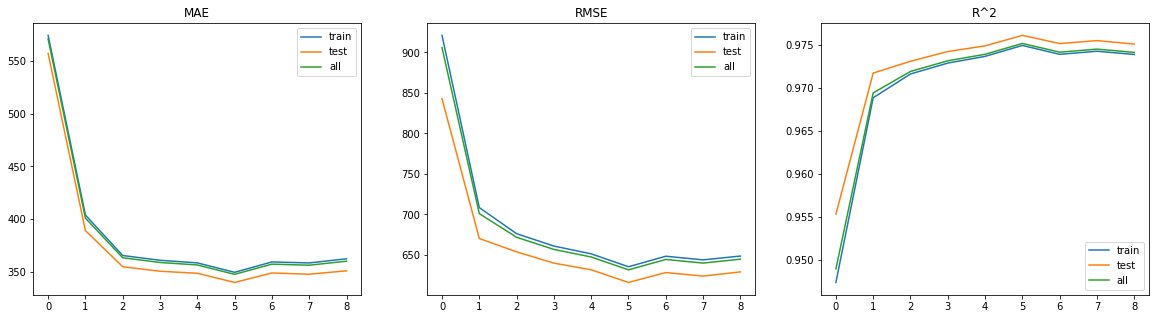

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

pd.DataFrame(mae_dict).plot(ax=axs[0], title='MAE')
pd.DataFrame(rmse_dict).plot(ax=axs[1], title='RMSE')
pd.DataFrame(rsquare_dict).plot(ax=axs[2], title='R^2');

As the plots show, the optimum degree for the polynomials is 7, as the model returns its lowest mean average error, root mean square error and its highest $R^2$. Let's see now if the model improves when some other features are removed.

### Carat (weight) out

I will attemp this with a range of degrees between 2 and 7

In [5]:
X = diamonds.iloc[:,2:-1]

In [6]:
X.head()

,cut,color,clarity,depth,table,x,y,z
0,5,7,4,62.3,55.0,5.11,5.07,3.17
1,2,2,5,63.6,60.0,7.30,7.33,4.65
2,3,1,2,61.7,60.0,6.95,7.01,4.31
3,5,2,3,62.1,55.0,6.83,6.79,4.23
4,4,2,3,61.2,60.0,7.67,7.65,4.69


In [7]:
mae_dict, rmse_dict, rsquare_dict = poly_lasso_cv(2,7,X,y,.2)

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111701940.84303284, tolerance: 46761078.15525863
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126225230.25720215, tolerance: 46761078.15525863
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127340785.8598671, tolerance: 46761078.15525863
  model = cd_fast.enet_coordinate_descent_gram(
/usr/loc

Degree 2 calculated


/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71025457.9276352, tolerance: 46761078.15525863
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80845081.66155624, tolerance: 51874348.34581547
  model = cd_fast.enet_coordinate_descent(


Degree 3 calculated
Degree 4 calculated
Degree 5 calculated
Degree 6 calculated
Degree 7 calculated


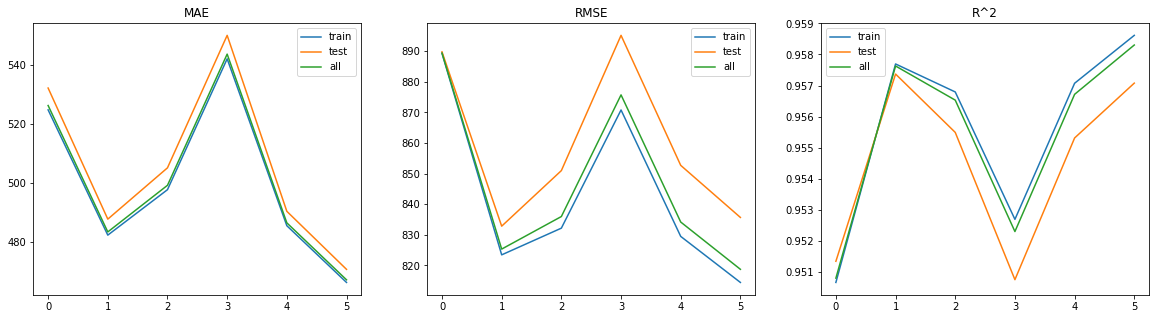

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

pd.DataFrame(mae_dict).plot(ax=axs[0], title='MAE')
pd.DataFrame(rmse_dict).plot(ax=axs[1], title='RMSE')
pd.DataFrame(rsquare_dict).plot(ax=axs[2], title='R^2');

As the plots show, the lowest RMSE for this data is over 800, and the MAE over 400, so it seems this will not improve the first attemp. 

### y and z out

Let's see now how the model behaves when I drop just the columns with the p-values over 0.05 in the OLS test I attempted in my first approach. I will also do this for a range of degrees between 2 and 7.

In [25]:
X = diamonds.iloc[:,1:-3]
X.head()

,carat,cut,color,clarity,depth,table,x
0,0.50,5,7,4,62.3,55.0,5.11
1,1.54,2,2,5,63.6,60.0,7.30
2,1.32,3,1,2,61.7,60.0,6.95
3,1.20,5,2,3,62.1,55.0,6.83
4,1.73,4,2,3,61.2,60.0,7.67


In [26]:
mae_dict, rmse_dict, rsquare_dict = poly_lasso_cv(2,7,X,y,.2)

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60707700.675086975, tolerance: 51799443.247341804
  model = cd_fast.enet_coordinate_descent(


Degree 2 calculated


/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50233190.05784607, tolerance: 46775156.87338307
  model = cd_fast.enet_coordinate_descent_gram(


Degree 3 calculated
Degree 4 calculated
Degree 5 calculated
Degree 6 calculated
Degree 7 calculated


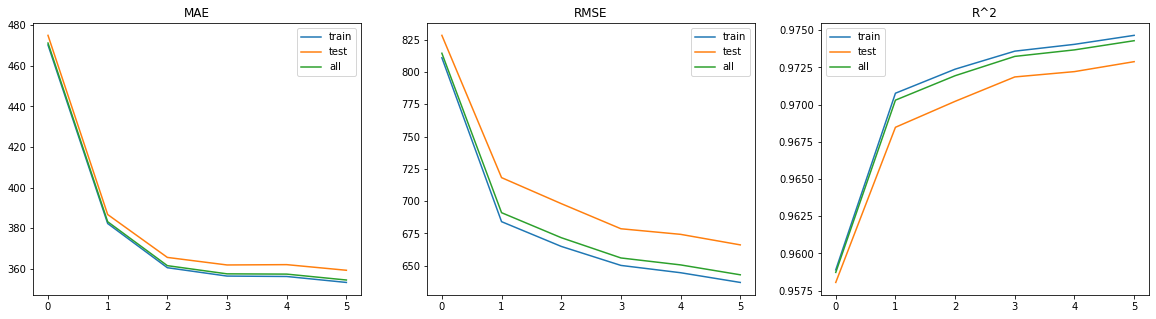

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

pd.DataFrame(mae_dict).plot(ax=axs[0], title='MAE')
pd.DataFrame(rmse_dict).plot(ax=axs[1], title='RMSE')
pd.DataFrame(rsquare_dict).plot(ax=axs[2], title='R^2');

It seems the results for the RMSE are similar, but a bit higher, to the results when all the three columns related to the size of the diamond were dropped. Given that, seems like the model that fits better our data id the model performed without the features related to the size of the diamond. 

Let's predict the prices for the 'non-price' dataset and make a third submission to Kaggle.

### Predicting test data

In [6]:
X = diamonds.iloc[:,1:-4]

X_to_pred = pd.read_csv('../data/pred_cate.csv').iloc[:,1:-3]
X_to_pred.head()

,carat,cut,color,clarity,depth,table
0,0.45,5,6,3,62.8,58.0
1,1.23,5,3,3,61.0,56.0
2,0.33,5,2,8,61.8,55.0
3,0.51,5,7,4,58.0,60.0
4,0.40,5,6,4,62.2,59.0


In [18]:
prediction = poly_lasso_cv_pred(X, y, 7, X_to_pred)
len(prediction)

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151332530.92973328, tolerance: 52312573.01553591
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76669550.56297112, tolerance: 51550470.251279004
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147797590.23716164, tolerance: 51550470.251279004
  model = cd_fast.enet_coordinate_descent_gram(
/usr/l

13485

In [19]:
diamonds_pred = pd.read_csv('../models_with_categoricals/data/pred_cate.csv')
diamonds_pred['price'] = prediction
diamonds_pred

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.45,5,6,3,62.8,58.0,4.88,4.84,3.05,1058.078253
1,1,1.23,5,3,3,61.0,56.0,6.96,6.92,4.23,6646.575450
2,2,0.33,5,2,8,61.8,55.0,4.46,4.47,2.76,695.624007
3,3,0.51,5,7,4,58.0,60.0,5.29,5.26,3.06,1633.939806
4,4,0.40,5,6,4,62.2,59.0,4.71,4.74,2.94,953.610784
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.30,5,2,3,62.2,57.0,4.25,4.27,2.65,514.371951
13481,13481,1.01,5,1,4,62.3,55.0,6.40,6.44,4.00,3803.391544
13482,13482,0.33,5,5,7,61.9,55.0,4.43,4.46,2.75,944.561140
13483,13483,0.30,5,4,4,59.3,59.0,4.42,4.38,2.61,594.012245


In [23]:
submission_poly_drop = diamonds_pred.iloc[:,[0,-1]]
submission_poly_drop.set_index('id', inplace=True)
submission_poly_drop.head()

,price
id,
0,1058.078253
1,6646.575450
2,695.624007
3,1633.939806
4,953.610784


In [24]:
submission_poly_drop.to_csv('../models_with_categoricals/submissions/poly_lasso_sub_drop.csv')